# Dengue Data Analysis Project
##### Sarayu Pulipati, Neel Hedaoo, Dr. Michael Robert

## Data Cleaning

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("cordoba_data_23_24.xlsx", engine="openpyxl")

In [5]:
df.dtypes

objectid                                  int64
evento                                   object
Sex                                      object
Birth Date (YYYY-MM-DD)          datetime64[ns]
Age                                     float64
Age Group                                object
Epidemic week of reporting              float64
Week started feeling symptoms            object
Country of residence                     object
Province of residence                    object
Department of residence                  object
City of residence                        object
Case classification                      object
Date Case Reported               datetime64[ns]
Date of Initial Symptoms         datetime64[ns]
ftm                              datetime64[ns]
Travel Status                            object
Neighborhood                             object
id_caso                                   int64
validacion                               object
dtype: object

In [6]:
df.columns = ['ID', 'Event', 'Sex', 'Birth_Date', 'Age',
       'AgeGroup', 'EpidemicWeekofReporting',
       'SymptomsWeekofReporting', 'CountryofResidence',
       'ProvinceofResidence', 'DepartmentofResidence', 'CityofResidence',
       'CaseClassification', 'DateCaseReported', 'DateofInitialSymptoms',
       'ftm', 'TravelStatus', 'Neighborhood', 'CaseID', 'Validation']

### Rename Columns

In [7]:
df = df.sort_values("ID") ### Sort ascending by ID

In [8]:
df['ID'] = df.ID.map(lambda i: i - 14455) ### Subtract 14455 from 'ID' to start from 1

In [9]:
df.isnull().any() ### check for missing data

ID                         False
Event                      False
Sex                         True
Birth_Date                  True
Age                         True
AgeGroup                   False
EpidemicWeekofReporting     True
SymptomsWeekofReporting     True
CountryofResidence          True
ProvinceofResidence        False
DepartmentofResidence       True
CityofResidence             True
CaseClassification         False
DateCaseReported           False
DateofInitialSymptoms       True
ftm                         True
TravelStatus                True
Neighborhood                True
CaseID                     False
Validation                  True
dtype: bool

In [10]:
df['Age'] = df['Age'].fillna(0) ### fill in missing data in 'Age' with 0

In [11]:
df['Birth_Date'] = df['Birth_Date'].fillna(0) ### fill in missing data in 'BirthDate' with 0
df['Sex'] = df['Sex'].fillna('n/a') ### fill in missing data in 'Sex' with 'n/a'
df['EpidemicWeekofReporting'] = df['EpidemicWeekofReporting'].fillna(0) ### fill in missing data in 'EpidemicWeekofReporting' with 0
df['SymptomsWeekofReporting'] = df['SymptomsWeekofReporting'].fillna(0) ### fill in missing data in 'SymptomsWeekofReporting' with 0
df['CountryofResidence'] = df['CountryofResidence'].fillna('n/a') ### fill in missing data in 'CountryofResidence' with 'n/a'
df['DepartmentofResidence'] = df['DepartmentofResidence'].fillna('n/a') ### fill in missing data in 'DepartmentofResidence' with 'n/a'
df['CityofResidence'] = df['CityofResidence'].fillna('n/a') ### fill in missing data in 'CityofResidence' with 'n/a'
df['DateofInitialSymptoms'] = df['DateofInitialSymptoms'].fillna(0) ### fill in missing data in 'DateofInitialSymptoms' with 0
df['TravelStatus'] = df['TravelStatus'].fillna('n/a') ### fill in missing data in 'TravelStatus' with 'n/a'
df['Neighborhood'] = df['Neighborhood'].fillna('n/a') ### fill in missing data in 'Neighborhood' with 'n/a'
df['Validation'] = df['Validation'].fillna('n/a') ### fill in missing data in 'Validation' with 'n/a'

In [12]:
df['Age'] = df.Age.map(int) ### change data type of 'Age' column to int
df['CaseID'] = df.CaseID.map(int) ### change data type of 'CaseID' column to int
df['EpidemicWeekofReporting'] = df.EpidemicWeekofReporting.map(int) ### change data type of 'EpidemicWeekofReporting' column to int

In [13]:
df.AgeGroup = df.AgeGroup.map(lambda s: s.replace('a', '-')) ### replace 'a' with '-' in 'AgeGroup'
df.AgeGroup = df.AgeGroup.map(lambda s: s.replace('05-9', '5-9')) ### replace in 'AgeGroup'
df.AgeGroup = df.AgeGroup.map(lambda s: s.replace('65ymás', '65+')) ### replace in 'AgeGroup'

In [14]:
df.CaseClassification.unique() # returns the distinct entries in the case classification column

array(['Caso confirmado por nexo epidemiológico autóctono',
       'Caso de Dengue en brote con laboratorio (+)',
       'Caso confirmado DEN-2', 'Caso confirmado sin serotipo',
       'Caso confirmado DEN-1', 'Caso confirmado DEN-3',
       'Caso confirmado por nexo epidemiológico importado',
       'Caso con coinfección de más de un serotipo de Dengue',
       'Caso probable', 'Caso confirmado DEN-4'], dtype=object)

In [15]:
# translations for Case Classification column
df.CaseClassification = df.CaseClassification.map(lambda s: s.replace('Caso confirmado DEN-1', 'Case confirmed as DEN-1'))
df.CaseClassification = df.CaseClassification.map(lambda s: s.replace('Caso confirmado DEN-2', 'Case confirmed as DEN-2'))
df.CaseClassification = df.CaseClassification.map(lambda s: s.replace('Caso confirmado DEN-3', 'Case confirmed as DEN-3'))
df.CaseClassification = df.CaseClassification.map(lambda s: s.replace('Caso confirmado DEN-4', 'Case confirmed as DEN-4'))
df.CaseClassification = df.CaseClassification.map(lambda s: s.replace('Caso probable', 'Probable case'))
df.CaseClassification = df.CaseClassification.map(lambda s: s.replace('Caso confirmado por nexo epidemiológico importado', 'Case confirmed by imported epidemiological link'))
df.CaseClassification = df.CaseClassification.map(lambda s: s.replace('Caso con coinfección de más de un serotipo de Dengue', 'Case with co-infection of more than one Dengue serotype'))
df.CaseClassification = df.CaseClassification.map(lambda s: s.replace('Caso de Dengue en brote con laboratorio (+)', 'Case confirmed as Dengue via laboratory (+)'))
df.CaseClassification = df.CaseClassification.map(lambda s: s.replace('Caso confirmado por nexo epidemiológico autóctono', 'Case confirmed by locally acquired epidemiological link'))
df.CaseClassification = df.CaseClassification.map(lambda s: s.replace('Caso confirmado sin serotipo', 'Case confirmed without serotype'))

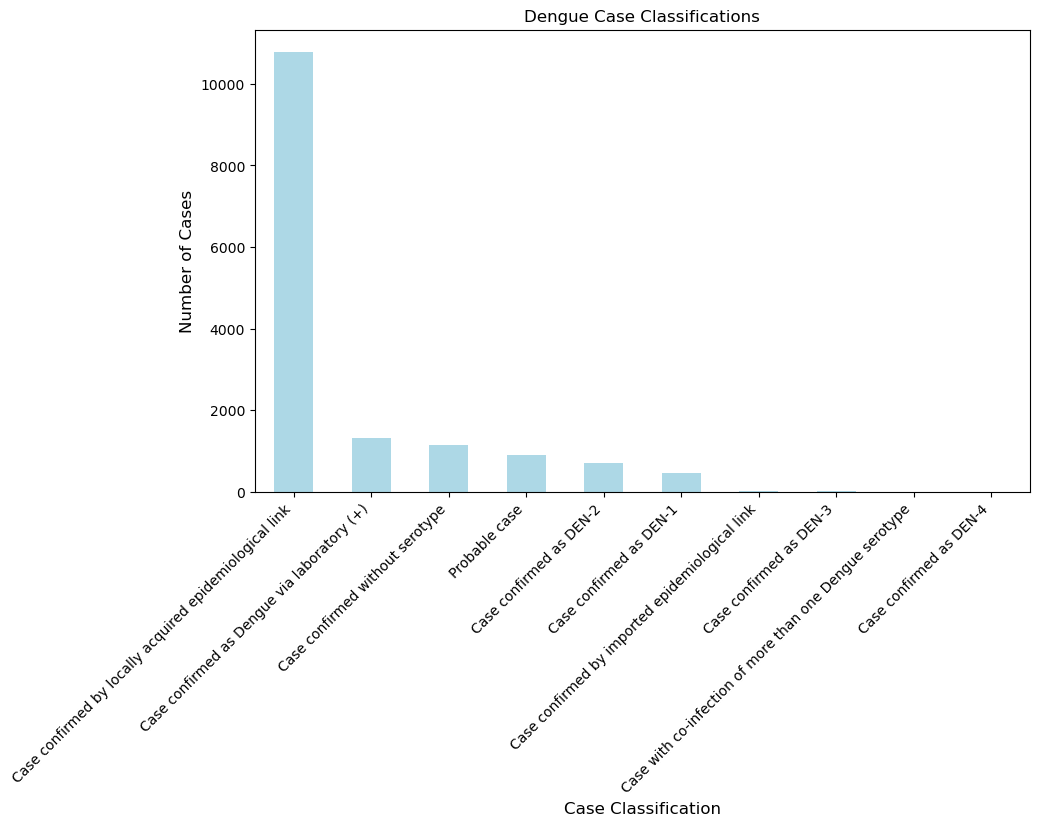

In [16]:
# graph of distributions of case classifications
case_counts = df['CaseClassification'].value_counts()
plt.figure(figsize=(10,6))
case_counts.plot(kind='bar',color='lightblue')
plt.title('Dengue Case Classifications')
plt.xlabel('Case Classification', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In [17]:
df.TravelStatus.unique() # returns the distinct entries in the travel status column
# questions to ask dr.robert - not sure why there are dates and long digits included in the travel column?
################################# come back to this part later ################################

array(['Sin antecedente de viaje a zona afectada en los últimos 15 días.',
       ' ',
       'Con antecedente de viaje a zona afectada en los últimos 15 días.',
       'Estudiado en contexto de Brote o Epidemia.',
       'Nexo con caso de Dengue confirmado', 'n/a', '3/4/2024',
       '20/3/2024', '5/4/2024', '2/4/2024', '22/3/2024', '27/3/2024',
       '30/3/2024', '1/4/2024', '28/3/2024', '4/4/2024', '26/3/2024',
       '23/3/2024', '31/3/2024', '25/3/2024', '29/3/2024', '24/3/2024',
       '6/4/2024', '21/3/2024', '18/3/2024', '15/3/2024', '19/3/2024',
       '8/3/2024', '17/3/2024', '11/3/2024', '13/3/2024', '14/3/2024',
       '3/3/2024', '9/3/2024', '16/3/2024', '28/2/2024', '10/3/2024',
       '27/2/2024', '1713484800000', '1713744000000', '1713225600000',
       '1713830400000', '1713398400000', '1713312000000', '1713657600000',
       '1713139200000', '1713052800000', '1713571200000', '1711411200000',
       '1712793600000', '1712102400000', '1711324800000', '1712880000000',
 

In [18]:
df.Validation.unique() # returns the distinct entries in the validation column

array(['Localizados', 'No localizados', 'n/a'], dtype=object)

In [19]:
# translations for Validation column
df.Validation = df.Validation.map(lambda s: s.replace('Localizados', 'Case Locator'))
df.Validation = df.Validation.map(lambda s: s.replace('No localizados', 'No Case Locator'))

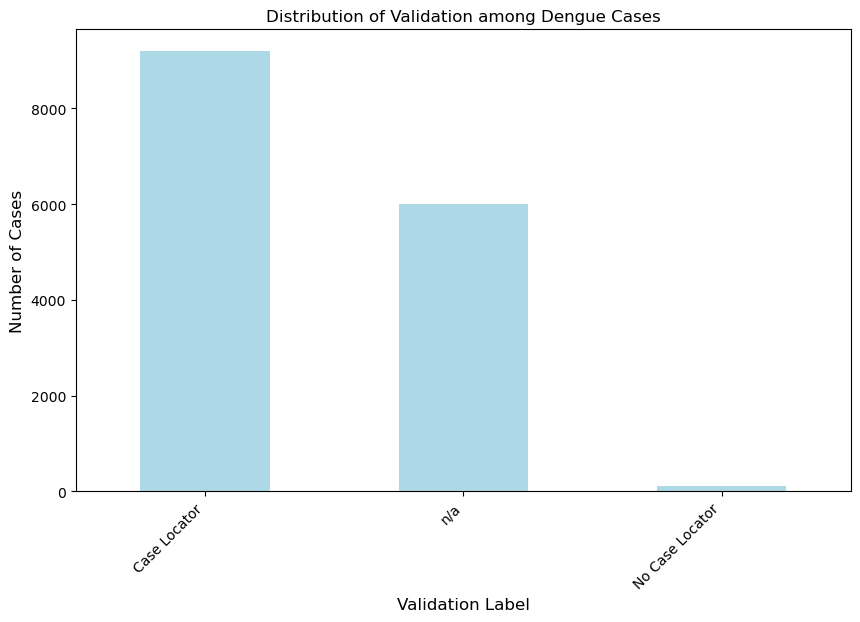

In [20]:
# graph of distributions of validation column
valid_counts = df['Validation'].value_counts()
plt.figure(figsize=(10,6))
valid_counts.plot(kind='bar',color='lightblue')
plt.title('Distribution of Validation among Dengue Cases')
plt.xlabel('Validation Label', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

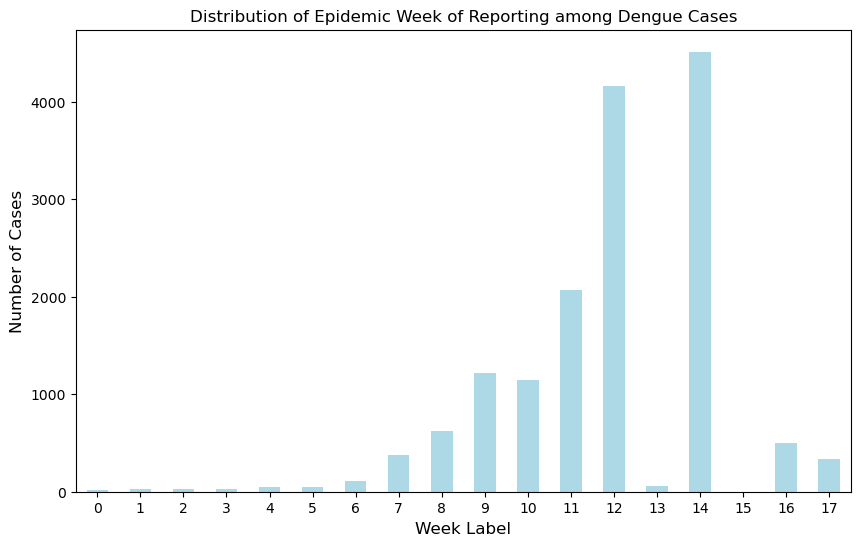

In [21]:
# graph of distributions of epidemic week of reporting
report_counts = df.sort_values(by='EpidemicWeekofReporting', ascending=True)
plt.figure(figsize=(10, 6))
report_counts['EpidemicWeekofReporting'].value_counts().sort_index().plot(kind='bar', color='lightblue')
plt.title('Distribution of Epidemic Week of Reporting among Dengue Cases')
plt.xlabel('Week Label', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation='horizontal')
plt.show()

In [253]:
##################################### Merge CPC and Cordoba Datasets #####################################
cpc = pd.read_excel('cpc_listado_2024.xlsx')
met_data = pd.read_excel('met_data_2023_2024.xlsx')

met_data.columns = ['Date', 'AverageVaporPressure', 'Temp_Max_prom', 'Temp_min_prom', 'Temp_med_prom', 'Precipitacion_prom', 'Hum_relat_prom'] #rename met_data columns

df['Neighborhood_clean'] = df['Neighborhood'].astype(str).str.strip()
cpc['Barrios_clean'] = cpc['Barrios'].astype(str).str.strip()


from difflib import get_close_matches

neighborhoods = df['Neighborhood_clean'].unique() # get the unique values
barrios = cpc['Barrios_clean'].unique()


fuzzy_map = {}

# find the best "good enough" matches for a given word from a list of possibilities
for n in neighborhoods:
    match = get_close_matches(n, barrios, n=1, cutoff=0.8)
    fuzzy_map[n] = match[0] if match else None


df['Matched_Barrio'] = df['Neighborhood_clean'].map(fuzzy_map)


cordoba_cpc_merged = pd.merge(df, cpc[['Barrios_clean', 'N° CPC', 'CPC']], how='left', left_on='Matched_Barrio', right_on='Barrios_clean')

#cordoba_cpc_merged.head()

In [254]:
### merge the precipitation data
cordoba_cpc_merged['DateofInitialSymptoms'] = pd.to_datetime(cordoba_cpc_merged['DateofInitialSymptoms'])
met_data['Date'] = pd.to_datetime(met_data['Date'])

merged_data = pd.merge(cordoba_cpc_merged, met_data, how='left', left_on='DateofInitialSymptoms', right_on='Date')

merged_data

,ID,Event,Sex,Birth_Date,Age,AgeGroup,EpidemicWeekofReporting,SymptomsWeekofReporting,CountryofResidence,ProvinceofResidence,...,Barrios_clean,N° CPC,CPC,Date,AverageVaporPressure,Temp_Max_prom,Temp_min_prom,Temp_med_prom,Precipitacion_prom,Hum_relat_prom
0,1,Dengue,F,2016-12-12 00:00:00,7,5-9,10,9,Argentina,Córdoba,...,JOSÉ IGNACIO DÍAZ 2da. SECCIÓN,13.0,CHALET SAN FELIPE,2024-02-28,25.76,29.30,20.65,24.55,0.00,84.0
1,2,Dengue,F,1974-06-25 00:00:00,49,45-65,9,9,Argentina,Córdoba,...,FERROVIARIO MITRE,7.0,EMPALME,2024-02-27,24.08,28.50,18.20,23.60,0.00,84.0
2,3,Dengue,F,1999-04-08 00:00:00,24,20-24,9,9,Argentina,Córdoba,...,FERROVIARIO MITRE,7.0,EMPALME,2024-02-25,21.68,22.55,17.75,19.40,11.30,95.5
3,4,Dengue,F,1986-07-04 00:00:00,37,35-44,10,9,Argentina,Córdoba,...,SAN PEDRO NOLASCO,6.0,VILLA EL LIBERTADOR,2024-02-29,26.96,29.40,21.90,24.65,1.05,88.0
4,5,Dengue,M,2009-12-29 00:00:00,14,10-14,10,8,Argentina,Córdoba,...,SAN PEDRO NOLASCO,6.0,VILLA EL LIBERTADOR,2024-02-24,16.33,27.40,16.05,21.85,10.90,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15309,21443,Dengue,F,2016-06-10 00:00:00,7,5-9,16,16,Argentina,Córdoba,...,NaN,NaN,NaN,2024-04-14,14.87,20.50,10.55,15.90,10.00,85.0
15310,21444,Dengue,M,2013-12-29 00:00:00,10,10-14,17,16,Argentina,Córdoba,...,NaN,NaN,NaN,2024-04-19,14.40,31.30,12.55,21.15,0.00,60.5
15311,21445,Dengue,F,1996-10-29 00:00:00,27,25-34,17,16,Argentina,Córdoba,...,NaN,NaN,NaN,2024-04-18,13.64,30.00,11.30,19.65,0.00,65.0
15312,21446,Dengue,F,1962-12-17 00:00:00,61,45-65,16,16,Argentina,Córdoba,...,AUTÓDROMO,3.0,ARGUELLO,2024-04-15,16.33,22.65,14.05,17.15,0.00,84.5


In [44]:
# calculate the medan age of infection
median_age_of_infection = df['Age'].median()
print(median_age_of_infection)

28.0


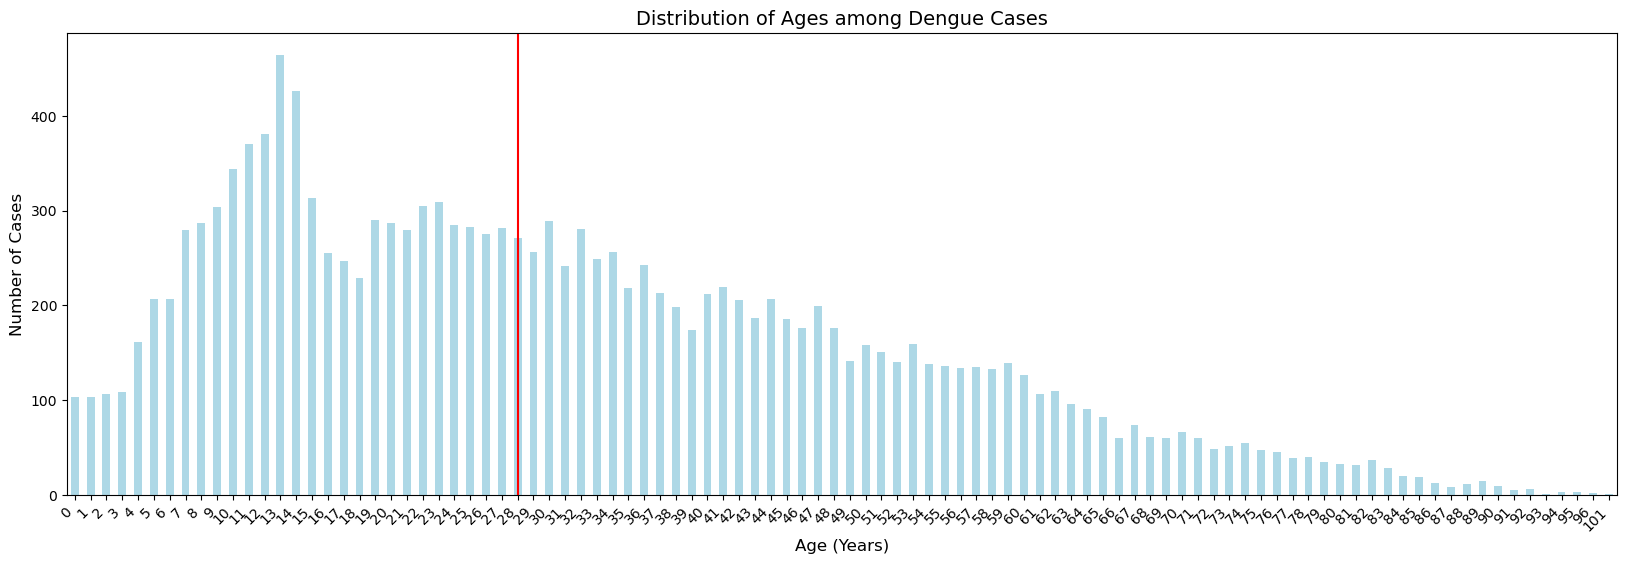

In [46]:
# graph of distribution of age
age_counts = df['Age'].value_counts().sort_index()
plt.figure(figsize=(20,6))
age_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Ages among Dengue Cases', fontsize=14)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.axvline(x=median_age_of_infection, color='red')
plt.show()

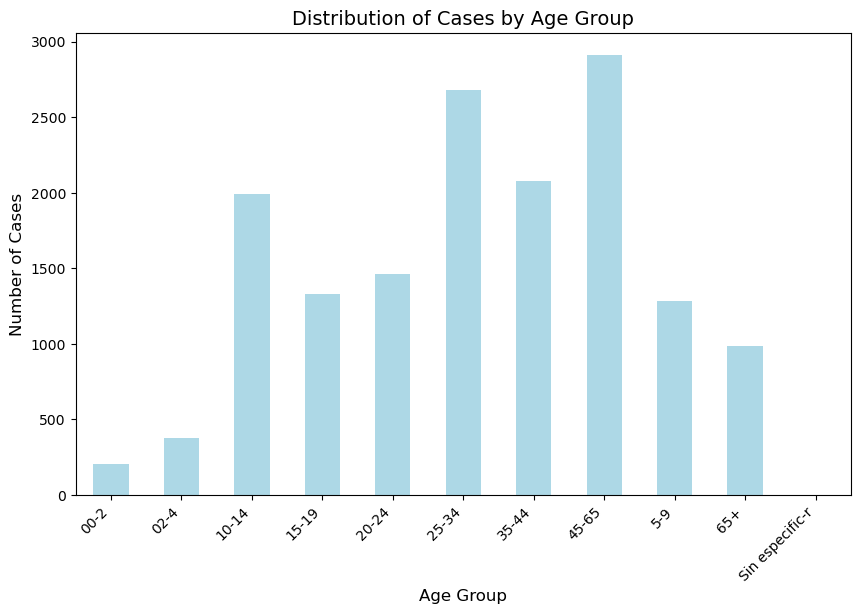

In [48]:
# graph of distribution of cases by age group
age_group_counts = df['AgeGroup'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Cases by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1200x1000 with 0 Axes>

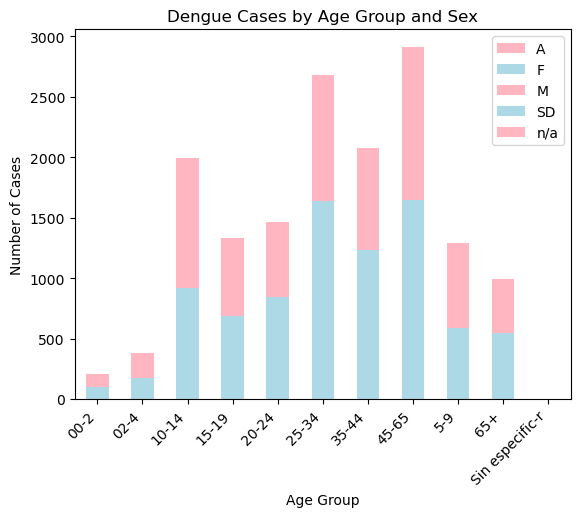

In [88]:
# stacked bar chart of distribution of gender for each age group
plt.figure(figsize=(12, 10))
age_sex_counts = df.groupby(['AgeGroup', 'Sex']).size().unstack()
age_sex_counts.plot(kind='bar', stacked=True, color=['lightpink', 'lightblue'])
plt.title('Dengue Cases by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

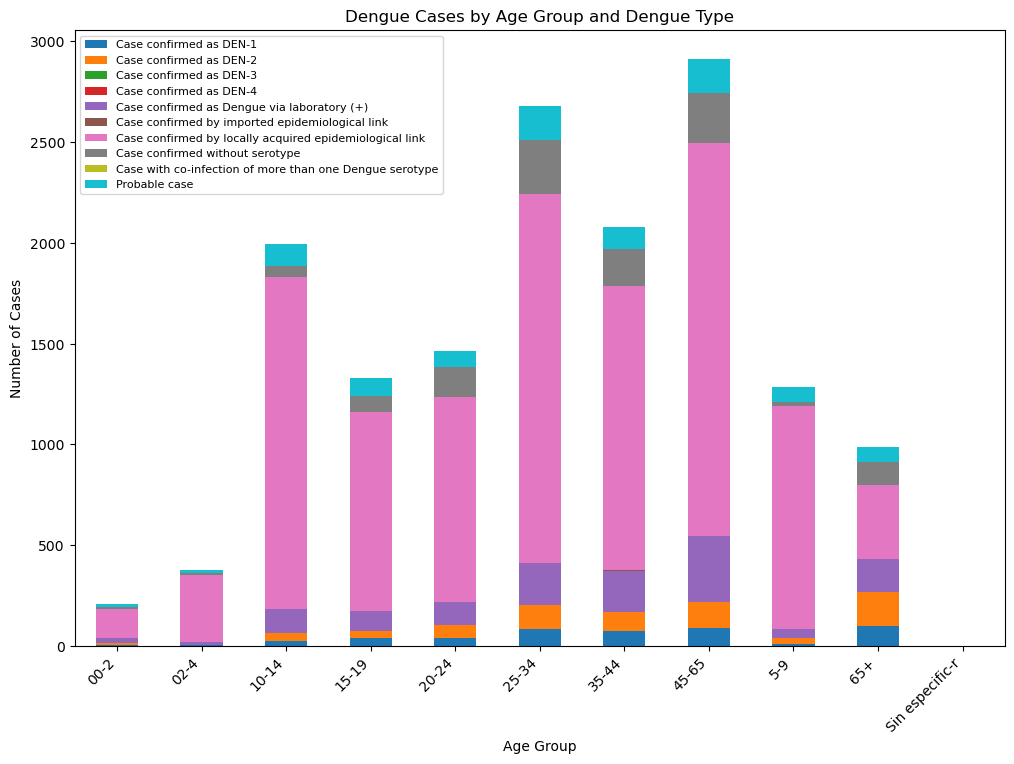

In [89]:
# graph of dengue cases by age group and dengue type
fig, ax = plt.subplots(figsize=(12, 8))
case_age_counts = df.groupby(['AgeGroup', 'CaseClassification']).size().unstack()
case_age_counts.plot(kind='bar', stacked=True, ax=ax)
plt.title('Dengue Cases by Age Group and Dengue Type')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(prop={'size': 8})
plt.show()

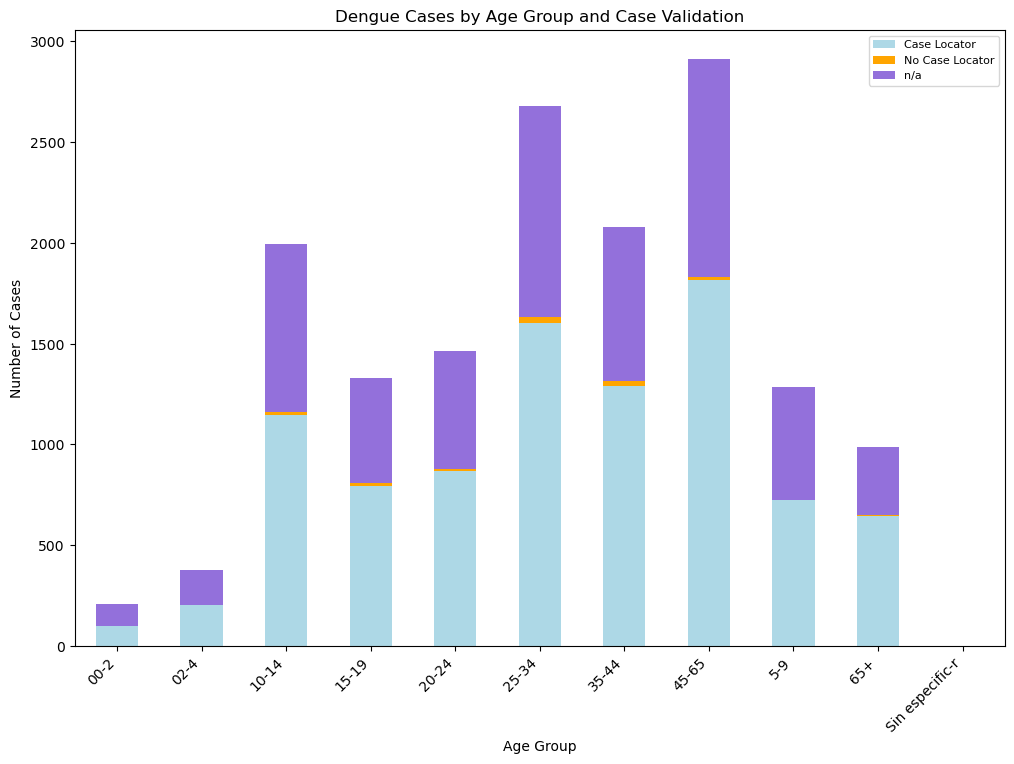

In [92]:
# graph of dengue cases by age group and whether case was confirmed by a locator
fig, ax = plt.subplots(figsize=(12, 8))
locator_age_counts = df.groupby(['AgeGroup', 'Validation']).size().unstack()
locator_age_counts.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'orange', 'mediumpurple'])
plt.title('Dengue Cases by Age Group and Case Validation')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(prop={'size': 8})
plt.show()

In [124]:
merged_data.to_csv('merged_datasets.csv', index=False)

In [220]:
#top 10 most prevalent barrios by number of cases
merged = pd.read_csv('merged_datasets.csv')

barrio_prevalence = merged['Matched_Barrio'].value_counts().reset_index() # number of cases in each barrio
barrio_prevalence.columns = ['Barrio', 'NumberOfCases']
barrio_prevalence.head(10) 

,Barrio,NumberOfCases
0,GÜEMES,437
1,VILLA EL LIBERTADOR,401
2,ALTA CÓRDOBA,395
3,OBSERVATORIO,370
4,ALTO ALBERDI,339
5,ALBERDI,294
6,RESIDENCIAL SAN ROQUE,282
7,CENTRO,225
8,MARQUÉS DE SOBREMONTE,221
9,SAN VICENTE,217
